# Training ML Models

In this section, an ML model will be trained to predict student dropout or academic success.

Since our target variable is categorical ("Dropout", "Enrolled"), we need to use models suitable for classification tasks. We have chosen the following models:

- k-Nearest Neighbors (kNN)
- Random Forest
- Decision Tree
- Naive Bayes

These models will be trained using the scikit-learn library. After training, hyperparameter tuning will be applied to enhance model performance. The goal is not to train a single model that performs very well but to conduct a quantitative analysis to identify the best model for this task from the four models mentioned above.

For hyperparameter tuning we used GridSearchCV from the library scikit-learn. We will pass possible values of parameters to have a better prediction result. There is also the possibility to use RandomSearchCV which we will not implement.

## Imports

In [1]:
import importnb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df_filtered = pd.read_csv('../data/dataset_dropout_filtered.csv')
df_filtered.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


## Define Train and Test Data

The data is split into 70% training data and 30% test data as seen in the cells below. This data was saved once as csv-files and is read from those to have the same results since we use shuffle to split the data.

In [3]:
#X = df_filtered.drop('Target', axis = 1)
#y = df_filtered['Target']
 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [4]:
#X_train.to_csv('X_training_data.csv',  sep = ',')
#X_test.to_csv('X_testing_data.csv',  sep = ',')
#y_train.to_csv('y_training_data.csv', sep =',')
#y_test.to_csv('y_testing_data.csv', sep =',')

In [5]:
X_train =  pd.read_csv('../data/X_training_data.csv').drop("Unnamed: 0", axis=1)
X_test = pd.read_csv('../data/X_testing_data.csv').drop("Unnamed: 0", axis=1)
y_train = pd.read_csv('../data/y_training_data.csv').drop("Unnamed: 0", axis=1)
y_test = pd.read_csv('../data/y_testing_data.csv').drop("Unnamed: 0", axis=1)

In [56]:
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

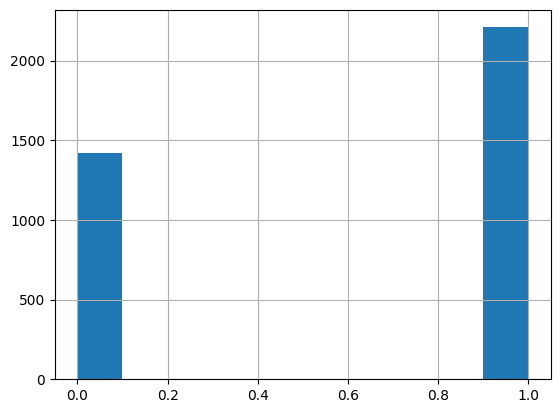

In [58]:
df_filtered["Target"].hist()
plt.show()

## 1. kNN 

### 1.1 Training the Model

In [59]:
model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred_knn = model_knn.predict(X_test)

### 1.2 Hypertuning the Model

In [61]:
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [62]:
gs_knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [63]:
gs_res_knn = gs_knn.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [64]:
gs_res_knn.best_score_

0.8744588744588745

In [65]:
gs_res_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [66]:
model_knn_tuned = gs_knn.best_estimator_
model_knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [67]:
y_pred_knn_tuned= model_knn_tuned.predict(X_test)

## 2. Random forest

### 2.1 Training the Model

In [68]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_pred_rf = model_rf.predict(X_test)

### 2.2 Hypertuning the Model

In [70]:
param_grid_random_forest = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, None], 
    'max_leaf_nodes': [3, 6, 9, None], 
} 

In [71]:
gs_random_forest = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_random_forest)
gs_random_forest.fit(X_train, y_train)
print(gs_random_forest.best_estimator_)
print(gs_random_forest.best_params_)
print(gs_random_forest.best_score_)

RandomForestClassifier(max_depth=9, max_features='log2', n_estimators=150)
{'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': None, 'n_estimators': 150}
0.9086900360441191


In [72]:
model_rf_tuned = gs_random_forest.best_estimator_

In [73]:
model_rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = model_rf_tuned.predict(X_test)

## 3. Decision Trees

### 3.1 Training the Model

In [74]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

### 3.2 Hypertuning the Model

In [75]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

gs_dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

gs_dt.fit(X_train,y_train)

cls_params = gs_dt.best_params_
cls_params

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': 25,
 'min_samples_split': 4}

In [76]:
model_dt_tuned = gs_dt.best_estimator_
y_pred_dt_tuned = model_dt_tuned.predict(X_test)


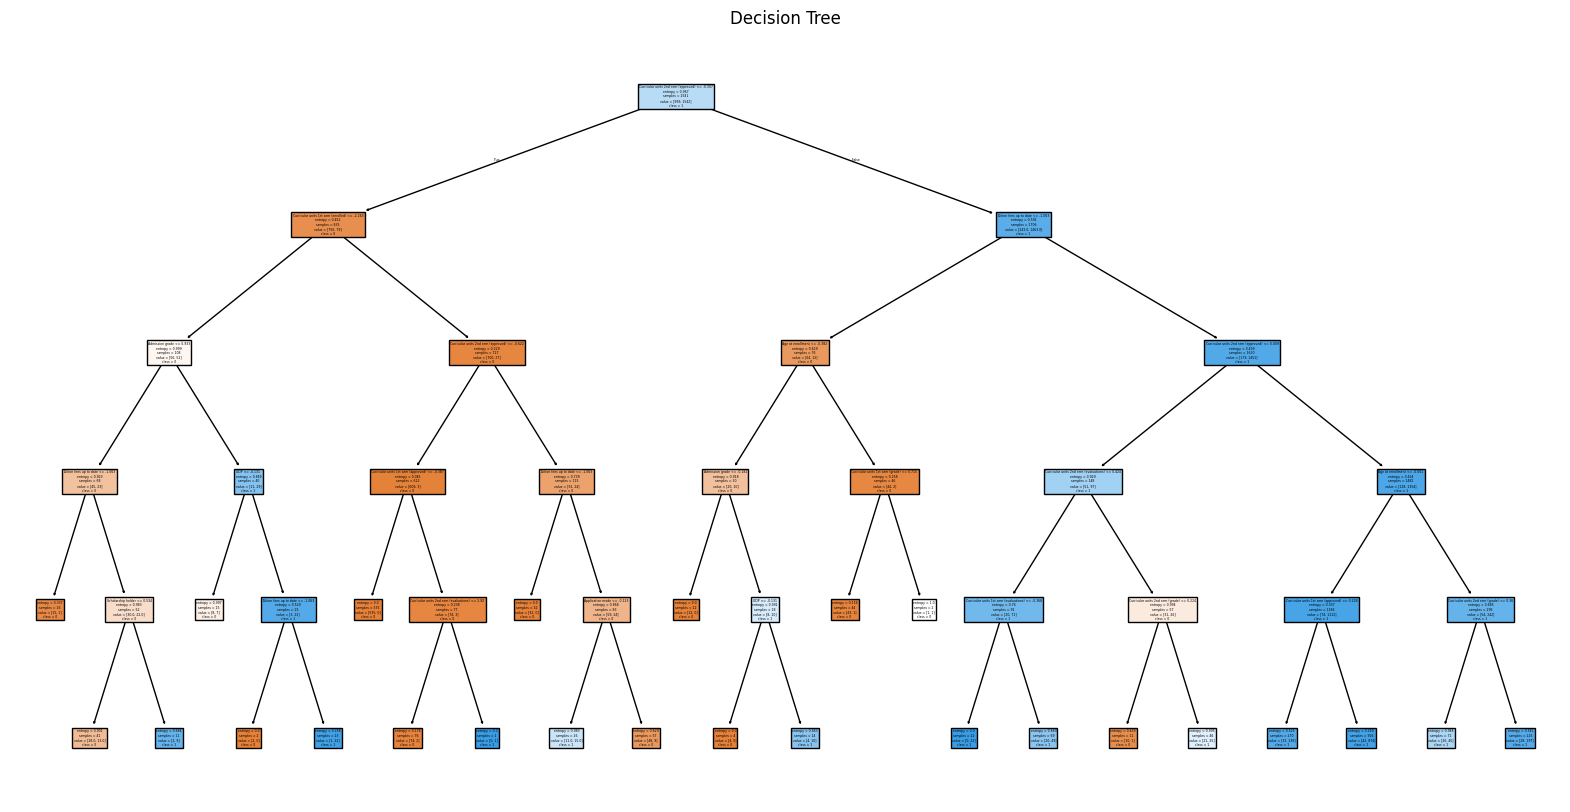

In [77]:
class_names = list(map(str, model_dt_tuned.classes_))

plt.figure(figsize=(20,10))
plot_tree(model_dt_tuned, filled=True, feature_names=df_filtered.columns[:-1], class_names=class_names)
plt.title('Decision Tree')
plt.show()

## 4. Naive Bayes

### 4.1 Training the Model

In [78]:
model_gb = GaussianNB()
model_gb.fit(X_train, y_train)

GaussianNB()

In [79]:
y_pred_gb = model_gb.predict(X_test)

### 4.2 Hypertuning the Model

In [80]:
cv_method_gb = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
params_gb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [81]:
grid_search_gb = GridSearchCV(GaussianNB(), 
                              param_grid=params_gb,
                              cv=cv_method_gb,
                              verbose=1, 
                              scoring='accuracy')

data_transformed = PowerTransformer().fit_transform(X_test)

grid_search_gb.fit(data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [82]:
grid_search_gb.best_params_

{'var_smoothing': 0.04328761281083057}

In [83]:
grid_search_gb.best_score_

0.8405445398046758

In [84]:
results_gb_tuned = pd.DataFrame(grid_search_gb.cv_results_['params'])
results_gb_tuned['test_score'] = grid_search_gb.cv_results_['mean_test_score']

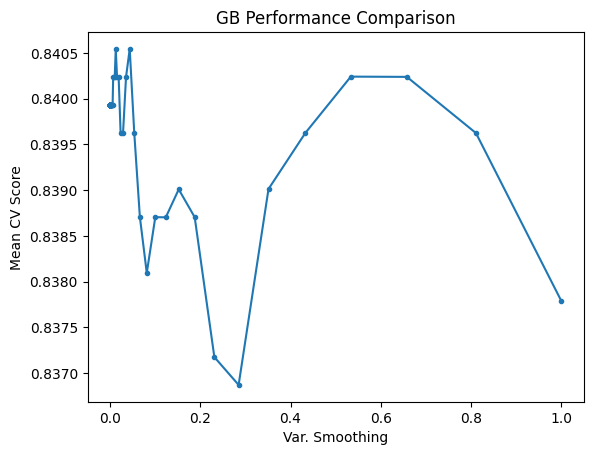

In [85]:
plt.plot(results_gb_tuned['var_smoothing'], results_gb_tuned['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("GB Performance Comparison")
plt.show()


In [86]:
model_gb_tuned = grid_search_gb.best_estimator_
y_pred_gb_tuned = model_gb_tuned.predict(X_test)

The evaluation of the trained models can be found in the notebook "Evaluation".